<a href="https://colab.research.google.com/github/AyuHidayatiMunasyiroh/CreditAnalyst/blob/main/Credit_Risk_Analyst.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Credit Risk Analyst

Credit Risk Analyst berkebalikan dengan Credit Scoring.

*   Credit Scoring : score yang menilai kemampuan peminjam untuk mengembalikan pinjamannya tepat waktu. semakin tinggi score, maka semakin baik atau semakin besar kemampuan peminjam dapat mengembalikan pinjaman. setiap lembaga memiliki cara yang berbeda untuk menghitung score ini (diawasi OJK), namun banyak yang mengadopsi sistem FICO (350-800)

*   Credit Risk : Rating / resiko yang dimiliki peminjam untuk tidak dapat mengembalikan pinjamannya atau mengalami default (kegagalan debitur dalam memenuhi kewajibannya sesuai dengan perjanjian atau akad kredit/komitmen lainnya yang ditanda-tangani bersama). rating 1-5 semakin tinggi maka semakin besar resiko defaultnya.

Analisis ini menggunakan data yang dapat diunduh melalui :

https://storage.googleapis.com/dqlab-dataset/credit_scoring_dqlab.xlsx

perlu melakukan install package di bawah ini

```
install.package ("openxlsx")
install.package ("C50")
```


In [2]:
#Install Packages yang dibutuhkan
install.packages("openxlsx")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘Rcpp’




In [12]:
#Install Packages yang dibutuhkan
install.packages("C50")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘plyr’, ‘reshape2’, ‘libcoin’, ‘mvtnorm’, ‘Formula’, ‘inum’, ‘Cubist’, ‘partykit’




# Overview C50
model yang digunakan adalah C5.0
dimana kita perlu mempersiapkan variabel input dan variabel class.

**variabel input** adalah variabel yang akan digunakan sebagai pertimbangan atau x factor dalam membuat rating

**variabel class** adalah variabel rating itu sendiri.

# Mempersiapkan Data


In [3]:
#Memanggil package openxlsx
library("openxlsx")

#Mempersiapkan data
dataCreditRating <- read.xlsx(xlsxFile = "https://storage.googleapis.com/dqlab-dataset/credit_scoring_dqlab.xlsx")
str(dataCreditRating)

#Melakukan konversi kolom risk_rating menjadi factor
dataCreditRating$risk_rating <- as.factor(dataCreditRating$risk_rating)

#Melihat struktur setelah konversi
str(dataCreditRating)

'data.frame':	900 obs. of  7 variables:
 $ kode_kontrak           : chr  "AGR-000001" "AGR-000011" "AGR-000030" "AGR-000043" ...
 $ pendapatan_setahun_juta: num  295 271 159 210 165 220 70 88 163 100 ...
 $ kpr_aktif              : chr  "YA" "YA" "TIDAK" "YA" ...
 $ durasi_pinjaman_bulan  : num  48 36 12 12 36 24 36 48 48 36 ...
 $ jumlah_tanggungan      : num  5 5 0 3 0 5 3 3 5 6 ...
 $ rata_rata_overdue      : chr  "61 - 90 days" "61 - 90 days" "0 - 30 days" "46 - 60 days" ...
 $ risk_rating            : num  4 4 1 3 2 1 2 2 2 2 ...
'data.frame':	900 obs. of  7 variables:
 $ kode_kontrak           : chr  "AGR-000001" "AGR-000011" "AGR-000030" "AGR-000043" ...
 $ pendapatan_setahun_juta: num  295 271 159 210 165 220 70 88 163 100 ...
 $ kpr_aktif              : chr  "YA" "YA" "TIDAK" "YA" ...
 $ durasi_pinjaman_bulan  : num  48 36 12 12 36 24 36 48 48 36 ...
 $ jumlah_tanggungan      : num  5 5 0 3 0 5 3 3 5 6 ...
 $ rata_rata_overdue      : chr  "61 - 90 days" "61 - 90 days" "0 - 30 

In [6]:
#Mempersiapkan variabel input

#Membuat data frame baru yang berisi hanya kolom yang digunakan saja.
data_input <- dataCreditRating[, (names(dataCreditRating)%in% c("durasi_pinjaman_bulan","jumlah_tanggungan"))]

#atau bisa menggunakan syntax
#input_columns <- c("durasi_pinjaman_bulan", "jumlah_tanggungan")
#dataf_input <- dataCreditRating[, input_columns]

str(data_input)

'data.frame':	900 obs. of  2 variables:
 $ durasi_pinjaman_bulan: num  48 36 12 12 36 24 36 48 48 36 ...
 $ jumlah_tanggungan    : num  5 5 0 3 0 5 3 3 5 6 ...


# Membuat data Training dan Testing pada Variabel Input
Total observasi yang dimiliki adalah sebanyak 900 obs, 800 akan digunakan sebagai data training dan 100 digunakan sebagai data testing.

*Membuat data seed terlebih dahulu*


```
set.seed(100)
indeks_data_training <- sample(900, 800)
```

set.seed adalah perintah untuk menyeragamkan bilangan acak yang muncul pada R.
sample(900,800) mengambil 800 observasi dari 900 observasi untuk dijadikan sebagai data training



In [8]:
#Mempersiapkan porsi index acak untuk training dan testing set
set.seed(100)
indeks_data_training <- sample(900,800)

#Membuat dan menampilkan training set dan testing set
input_data_training <- data_input[indeks_data_training,]
class_data_training <- dataCreditRating[indeks_data_training,]$risk_rating
input_data_testing <- data_input[-indeks_data_training,]

str(input_data_training)
str(class_data_training)
str(input_data_testing)

'data.frame':	800 obs. of  2 variables:
 $ durasi_pinjaman_bulan: num  36 24 36 36 36 24 12 48 48 12 ...
 $ jumlah_tanggungan    : num  1 1 5 1 5 3 3 3 0 0 ...
 Factor w/ 5 levels "1","2","3","4",..: 1 1 4 1 5 3 3 3 2 1 ...
'data.frame':	100 obs. of  2 variables:
 $ durasi_pinjaman_bulan: num  12 36 48 36 48 48 12 12 12 12 ...
 $ jumlah_tanggungan    : num  0 0 3 3 6 5 0 0 0 4 ...


# Menghasilkan Model dengan C50

Syntax penggunaan fungsi C5.0 adalah sebagai berikut:

`C5.0(input_variables, class_variables)`



Call:
C5.0.default(x = input_data_training, y = class_data_training)


C5.0 [Release 2.07 GPL Edition]  	Wed Oct  4 04:06:15 2023
-------------------------------

Class specified by attribute `outcome'

Read 800 cases (3 attributes) from undefined.data

Decision tree:

jumlah_tanggungan > 4:
:...durasi_pinjaman_bulan <= 24: 4 (105/30)
:   durasi_pinjaman_bulan > 24: 5 (120/51)
jumlah_tanggungan <= 4:
:...jumlah_tanggungan > 2: 3 (216/20)
    jumlah_tanggungan <= 2:
    :...durasi_pinjaman_bulan <= 36: 1 (264/80)
        durasi_pinjaman_bulan > 36:
        :...jumlah_tanggungan <= 0: 2 (37/7)
            jumlah_tanggungan > 0: 3 (58/4)


Evaluation on training data (800 cases):

	    Decision Tree   
	  ----------------  
	  Size      Errors  

	     6  192(24.0%)   <<


	   (a)   (b)   (c)   (d)   (e)    <-classified as
	  ----  ----  ----  ----  ----
	   184     2     5     6     6    (a): class 1
	    80    30    19     6    11    (b): class 2
	           3   250                (c):

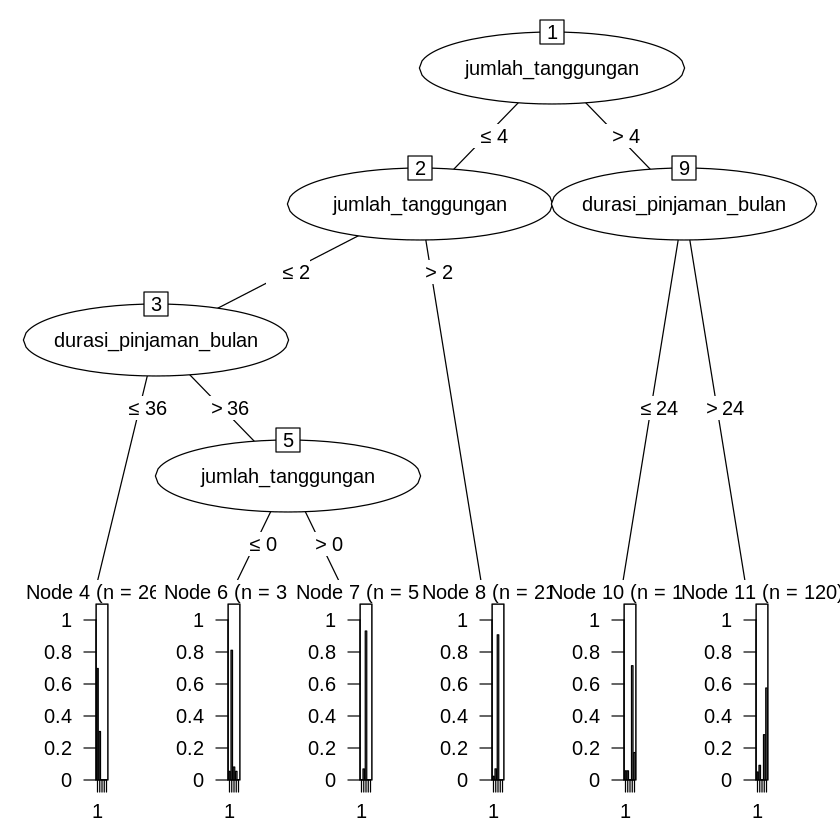

In [14]:
#Memanggil package C5.0
library("C50")

#menghasilkan model dan menampilkan summary model
risk_rating_model <- C5.0(input_data_training, class_data_training)
summary(risk_rating_model)

#Membuat plot decision tree
plot(risk_rating_model)

Interpretasi hasil
model C5.0 menghasilkan decision tree dimana dihasilkan 6 Node

*   **Jumlah Tanggungan > 4 dan durasi pinjaman <= 24 bulan** terdapat 105 data, dengan 30 data salah. Rating 4
*   **Jumlah tanggungan > 4 dan durasi pinjaman > 24 bulan** terdapat 120 data, dengan 51 data salah. Rating 5
*   **Jumlah tanggungan <= 4 dan >2** terdapat 216 data, dengan 20 data salah. Rating 3
*   **Jumlah tanggungan <= 4 dan <= 2 dan durasi pinjaman <= 36** terdapat 264 data, dengan 80 data salah. Rating 1
*   **Jumlah tanggungan 0 dan durasi pinjaman > 36** terdapat 37 data, dengan 7 data salah. Rating 2
*   **Jumlah tanggungan 1,2 dan durasi pinjaman > 36** terdapat 58 data, dengan 4 data salah. Rating 3

presentase kesalahan model adalah 24%

Confussion matrix menghasilkan matrix data yang seharusnya masuk rating 1 dan benar diberikan rating 1, masuk rating 1 tetapi diberikan rating lainnya dan lain-lain. hasilnya akan sama dengan list di atas.

bar chart di leaf node merupakan grafik batang yang menggambarkan persentase rating dengan nilai yang benar-benar dimasukkan. misalkan pada leafnode 1, terdapat 70% data yang benar masuk pada rating 1, dan 30% data yang salah di rating 2.
